In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib widget
# %matplotlib inline

DATAFILE = "data/Messaussetzer_data_in.dat"
df = pd.read_csv(DATAFILE, sep=" ")
t = df["time"].values
y = df["position"].values
u = np.zeros(len(y))
Ts = t[1] - t[0]

print(y[0])

1.32823283830953


In [41]:
# Define system matrices
Ad = np.array([[1, Ts],
               [0, 1]])
Bd = np.array([[0],
               [0]])
C = np.array([1, 0])
D = np.array([0])
Gd = np.array([[Ts],
               [1]])
               
# Initialization
x_dach = np.array([[y[0]], [0]])    # estimate
P_dach = 50 * np.eye(2)
d_y = np.zeros(len(y))              # new error
y_dach = np.zeros(len(y))           # error
s = np.zeros(len(y))                # prediction output array
s_dach = np.zeros(len(y))
v = np.zeros(len(y))                # variation
u = np.zeros(len(y))

P_tilde0 = np.zeros(len(y))
P_tilde1 = np.zeros(len(y))
P_tilde2 = np.zeros(len(y))
P_tilde3 = np.zeros(len(y))

print(y[1] - y_dach[1])

1.81562064480669


In [42]:
y_filtered = []
for i in range(len(t)):
    if str(y[i]) == "nan":
        break
    else:
        y_filtered.append(y[i])

y_rand_var = []
for i in range(0, 3, 1):
    y_rand_temp = random.choices(y_filtered[0:len(y_filtered)], k=30)

    y_rand_var.append(np.var(y_rand_temp))

print(y_rand_var)

R = np.array([min(y_rand_var)])
Q = np.array([0.00016667])

[65.48747461087292, 77.87297989439031, 80.90784752727589]


In [43]:
for k in range(len(y)):
    y_dach[k]= (C @ x_dach + D * u[k])
    d_y[k] = y[k] - y_dach[k]
    K = P_dach @ C.reshape(-1,1)
    # K2 = np.linalg.pinv(C @ P_dach @ C.reshape(-1,1) + R) # does not work
    K = K * (C @ P_dach @ C.reshape(-1,1) + R) ** (-1)
    x_tilde = x_dach + K * d_y[k]
    P_tilde = (np.eye(2) - K * C) @ P_dach
    print(P_tilde)

    x_dach = Ad @ x_tilde + Bd * u[k]
    P_dach = Ad @ P_tilde @ Ad.T + Gd @ Q * Gd.T
    s[k] = x_tilde[0]
    v[k] = x_tilde[1]
    s_dach[k] = x_dach[0]

    # P_tilde0 = P_tilde[0][0]
    # P_tilde1 = P_tilde[0][1]
    # P_tilde2 = P_tilde[1][0]
    # P_tilde3 = P_tilde[1][1]

[[28.35263081  0.        ]
 [ 0.         50.        ]]
[[20.02844914  3.47093403]
 [ 3.47081949 49.73515911]]
[[16.02679719  6.37795946]
 [ 6.37774833 48.91291447]]
[[13.99057022  8.86184912]
 [ 8.86155335 47.38813999]]
[[13.01090396 10.89864756]
 [10.89827833 45.12488714]]
[[12.62607702 12.43998211]
 [12.43955087 42.19762855]]
[[12.55702558 13.46542387]
 [13.46494195 38.77233494]]
[[12.62343157 13.9998038 ]
 [13.99928159 35.06511973]]
[[12.71203924 14.10822815]
 [14.10767433 31.29394303]]
[[12.75913286 13.87929587]
 [13.8787171  27.64091647]]
[[12.73628644 13.40664401]
 [13.40604488 24.23395475]]
[[12.63783487 12.77527797]
 [12.77466131 21.14611836]]
[[12.47083857 12.05452966]
 [12.05389685 18.40555932]]
[[12.24801753 11.29644548]
 [11.29579688 16.00896313]]
[[11.9833935  10.5374248 ]
 [10.53676007 13.93395508]]
[[11.6899715   9.80122249]
 [ 9.80054087 12.14858755]]
[[11.37875031  9.1021241 ]
 [ 9.10142459 10.61772023]]
[[11.05849657  8.44771545]
 [ 8.44699691  9.30686051]]
[[10.73590

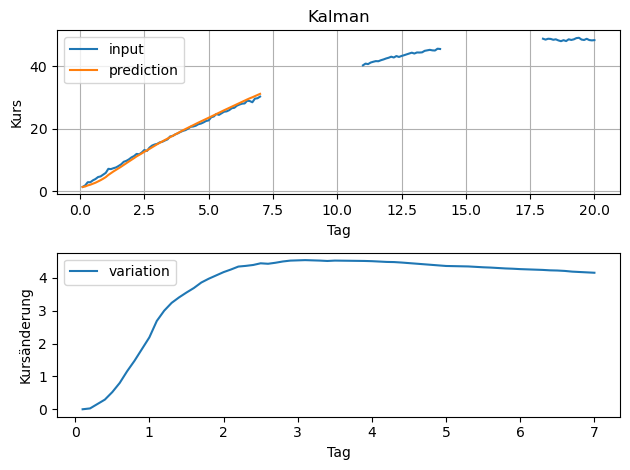

In [45]:
plt.figure()
plt.subplot(2, 1, 1)
plt.title("Kalman")
plt.xlabel("Tag")
plt.ylabel("Kurs")
plt.grid(True)
plt.plot(t, y, label="input")
plt.plot(t, s, label="prediction")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, v, label="variation")
plt.xlabel("Tag")
plt.ylabel("Kursänderung")
plt.legend()
plt.tight_layout()
plt.show()